# DEEP LEARNING PROJECT-2: MULTI-LAYER PERCEPTRON

For our second project we selected fruits classification.
We chose 5 classes of fruits.
Each class having 200 images and a total of 1000 images.
the classes are apple, banana, mango, orange and strawberry

IMPORTING LIBRARIES

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving utils.py to utils.py


{'utils.py': b'import torch\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\nimport seaborn as sns\r\n\r\ncmap = sns.diverging_palette(262, 10, sep=1, n=16, s=99, l=50, center="dark", as_cmap=True) # best\r\n\r\n\r\ndef show(X):\r\n\tif X.dim() == 3 and X.size(0) == 3:\r\n\t\tplt.imshow( np.transpose(  X.numpy() , (1, 2, 0))  )\r\n\t\tplt.show()\r\n\telif X.dim() == 2:\r\n\t\tplt.imshow(   X.numpy() , cmap=\'gray\'  )\r\n\t\tplt.show()\r\n\telse:\r\n\t\tprint(\'WRONG TENSOR SIZE\')\r\n\r\n\r\ndef show_template(template):\r\n\tvm=0.3  \r\n\theight=4\r\n\twidth=6  \r\n\tf, ax1 = plt.subplots()\r\n\ttemp=template.detach().numpy()\r\n\tsns.heatmap(temp, cmap=cmap, ax=ax1, cbar=True,square=True,vmin=-vm, vmax=vm )  \r\n\tplt.show()\r\n\r\n\r\n\r\ndef show_prob_mnist(p):\r\n\r\n\tp=p.data.squeeze().numpy()\r\n\r\n\tft=15\r\n\tlabel = (\'zero\', \'one\', \'two\', \'three\', \'four\', \'five\', \'six\', \'seven\', \'eight\',\'nine\')\r\n\t#p=p.data.squeeze().numpy()\r\n\ty_pos = np.

In [ ]:
import utils
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


UPLOADING TRAINING DATA

In [ ]:
training_data = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/fruits2/Fruits2/train', transform = transforms.ToTensor())
test_data = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/fruits2/Fruits2/test', transform = transforms.ToTensor())

In [ ]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

In [ ]:
classes = ('apple','banana' , 'mango','orange', 'strawberry')

SHOWING SOME OF THE IMAGES

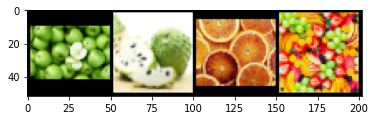

In [ ]:
# functions to show an image

def imshow(img):
    npimg = torch.Tensor.cpu(img).numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
#print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

SELECTING DEVICE

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

DEFINING THE NEURAL NETWORK (MULTILAYER PERCEPTRON)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*48*48, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 7),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
net = NeuralNetwork().to(device)

 CHOOSING THE LOSS FUNCTION(CRITERION) AND OPTIMIZER

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.02)

TRAINING THE MODEL

In [ ]:
for epoch in range(70):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
       
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'Epoch:{epoch + 1}    loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


CHECKING ACCURACY ON TRAINING SET

In [ ]:
correct = 0
total = 0
running_error = 0
num_batches = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        error = utils.get_error( outputs , labels)

        running_error += error.item()

        num_batches+=1

total_error = running_error/num_batches
print( 'error rate on train set =', total_error*100 ,'percent')

print(f'Accuracy of the network on the train images: {100 * correct // total} %')

error rate on train set = 0.9308510638297872 percent
Accuracy of the network on the train images: 99 %


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: apple is 100.0 %
Accuracy for class: banana is 98.7 %
Accuracy for class: mango is 100.0 %
Accuracy for class: orange is 99.3 %
Accuracy for class: strawberry is 97.3 %


VISUALIZING TEST IMAGES

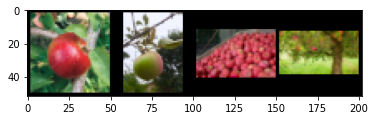

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
# print images
imshow(torchvision.utils.make_grid(images))
#print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4))

EVALUATING ON THE TEST SET

In [ ]:
outputs = net(images)
correct = 0
total = 0
running_error = 0
num_batches = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        error = utils.get_error( outputs , labels)

        running_error += error.item()

        num_batches+=1

total_error = running_error/num_batches
print( 'error rate on test set =', total_error*100 ,'percent')

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

error rate on test set = 25.0 percent
Accuracy of the network on the test images: 74 %


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: apple is 68.0 %
Accuracy for class: banana is 74.0 %
Accuracy for class: mango is 80.0 %
Accuracy for class: orange is 72.0 %
Accuracy for class: strawberry is 80.0 %
